# **< 기본 설정 Install >**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install category-encoders

     |████████████████████████████████| 81kB 5.2MB/s 


In [3]:
!pip3 install pandas_profiling --upgrade

     |████████████████████████████████| 256kB 7.7MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 112kB 57.9MB/s 
     |████████████████████████████████| 3.1MB 54.0MB/s 
     |████████████████████████████████| 10.1MB 15.3MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 645kB 48.4MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
     |████████████████████████████████| 296kB 40.4MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=e9492ecd377e701c0cbef37483c6505c79179833c4227cf633474d9e2ec84844
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=60429c78347ee95a550bc5fb944311e4784b40860d3a8a0b021970a990c28092
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85

In [4]:
pip install eli5

     |████████████████████████████████| 112kB 8.5MB/s 


In [5]:
pip install PDPbox

     |████████████████████████████████| 34.0MB 94kB/s 
     |████████████████████████████████| 13.1MB 236kB/s 
  Created wheel for PDPbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758227 sha256=a8c049c6d29fefb34f7e819a7200e0c672704e3b9293be17b70957044d777e55
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built PDPbox
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
ERROR: pandas-profiling 3.0.0 has requirement matplotlib>=3.2.0, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [6]:
pip install shap

     |████████████████████████████████| 358kB 6.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=1b5bb925017e6d90febc481d466e4bc5b750c9412aeeba0b08f279f5d07e7c51
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


# **< 데이터 불러오기 >**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
from sklearn.model_selection import validation_curve

import eli5
from eli5.sklearn import PermutationImportance
import plotly.express as px
import plotly.graph_objects as go
import graphviz
from sklearn.tree import export_graphviz
from scipy.stats import randint, uniform
from scipy import stats

from pdpbox import pdp
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/Hotel_Bookings/Hotel_Bookings.csv')

In [9]:
## profiling을 사용하여 전체적인 데이터셋 확인

profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **< 결측치 처리 >**

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# 4개의 컬럼(children, country, agent, company )에 결측치 존재

# children = median 중앙값 0
df.fillna({"children": 0}, inplace=True)

# country = "Unknown"으로 대체
df.fillna({"country": "Unknown"}, inplace=True)

# agent = 개인정보 보호로 agent명을 코드형식인 숫자로 부여했다고 생각함. 그래서 결측치는 개인이라고 생각. 개인 = 숫자 0 부여
df.fillna({"agent": 0}, inplace=True)

# company = agent와 동일
df.fillna({"company": 0}, inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## **< Feature Engineering >**

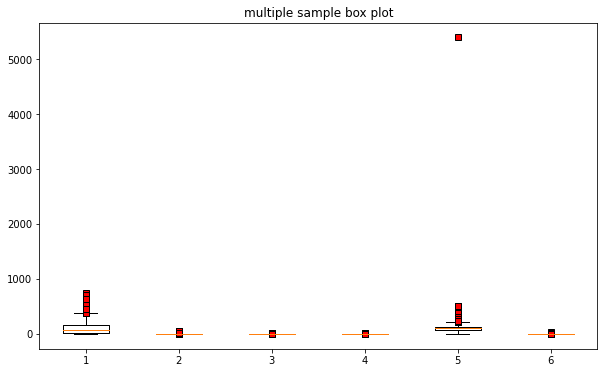

In [13]:
# 이상치가 발생될 수 있는 연속형 컬럼 확인

data = [df['lead_time'], df['adults'], df['children'], df['babies'], df['adr'], df['booking_changes']]

plt.figure(figsize=(10, 6))
green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)
plt.title("multiple sample box plot")
plt.show()

In [14]:
### children 컬럼 int로 형변환 ###
df = df.astype({'children': 'int'})


### 새로운 특성 만들기 ###
# 총 숙박손님수 만들기
df['Total_people'] = df['adults'] + df['children']+ df['babies']
# 총 숙박일수 만들기
df['Total_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']


### 필요없는 행 제거###
# adults = 0일 경우 삭제
# 호텔에는 최소 1인 이상 방문하는데 adult숫자가 1이하이거나 children, babies의 숫자만 있는것은 이상치이다.
# Total_stays = 0일 경우 삭제
# 호텔에는 숙박을 하기 위해 오는 것인데, stay 숫자가 0인 경우는 이상치이다.
# adr = 0일 경우 삭제
# 1일 숙박료가 0이라는것은 이벤트 당첨 이거나 문제가 생겨서 할인을 해준 것이라고 생각한다. 이런 경우는 취소와 거리가 멀다.
# adr = 1,000이상일 경우 삭제
# adr이 1박 숙박료를 의미한다면 너무 비싼 숙박료이고 차이가 너무 많이 난다. 
indexnames = df[(df['adults'] == 0) | (df['Total_stays'] == 0) | (df['adr'] <= 0) | (df['adr'] > 1000)].index
df.drop(indexnames, inplace=True)


### meal 특성의 Undefined값을 SC 값으로 변경 ###
df['meal'] = df['meal'].str.replace('Undefined', 'SC')

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_people,Total_stays
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2


## **< EDA >**

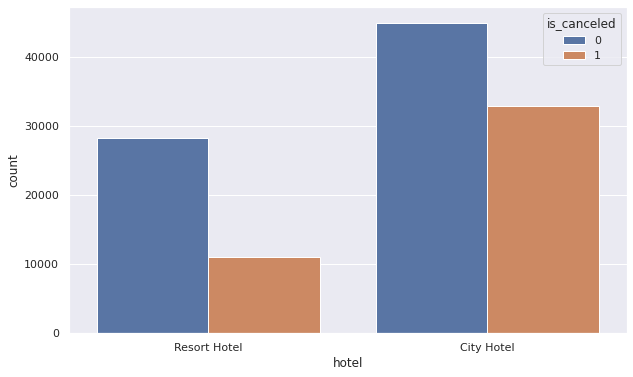

In [16]:
# 호텔별 예약수 / 취소수
# City hotel이 Resort hotel 보다 예약율도 높고, 취소율도 높다

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='hotel', hue='is_canceled', data=df)

In [17]:
cancel = {1:'cancel', 0:'Not_cancel'}
df['cancel'] = df['is_canceled'].map(cancel)

hotel_canceled = df['is_canceled'].groupby([df['hotel'],df['cancel']]).count()
hotel_canceled.unstack()

cancel,Not_cancel,cancel
hotel,,
City Hotel,44984,32890
Resort Hotel,28269,11038


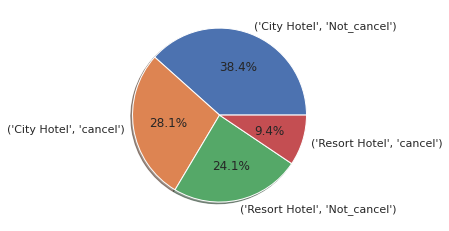

In [18]:
s = df['is_canceled'].groupby([df['hotel'],df['cancel']]).count()
plt.pie(x=s, labels=s.index, autopct='%.1f%%', shadow=True)
plt.show()

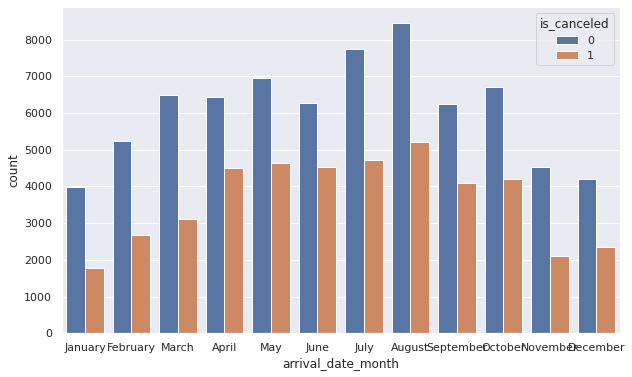

In [19]:
# 월별 예약율, 취소율

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df, order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"])

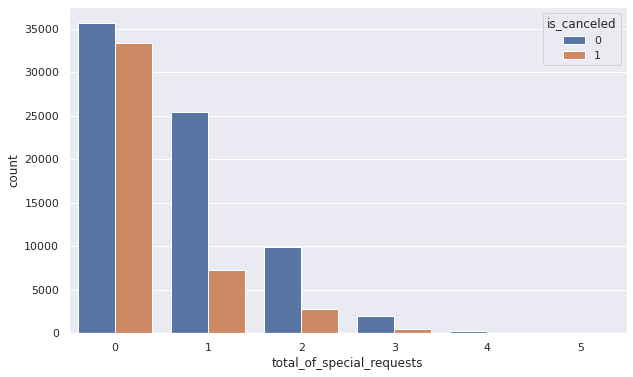

In [20]:
# 요구사항이 1건이라도 있으면 취소율이 급격히 하락

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df)

In [21]:
# lead_time 변화에 따른 취소율 
# lead_time이 길어질수록 취소율이 높아진다

lead_time_1 = df[df["lead_time"] < 100]
lead_time_2 = df[(df["lead_time"] >= 100) & (df["lead_time"] < 365)]
lead_time_3 = df[df["lead_time"] >= 365]

lead_cancel_1 = lead_time_1["is_canceled"].value_counts()
lead_cancel_2 = lead_time_2["is_canceled"].value_counts()
lead_cancel_3 = lead_time_3["is_canceled"].value_counts()

total_lead_days_cancel = pd.DataFrame(data=[lead_cancel_1,lead_cancel_2,lead_cancel_3],
             index=["[0,100) days", "[100,365) days", "[365,max) days"])
total_lead_days_cancel

,0,1
"[0,100) days",50197,19658
"[100,365) days",22043,22090
"[365,max) days",1013,2180


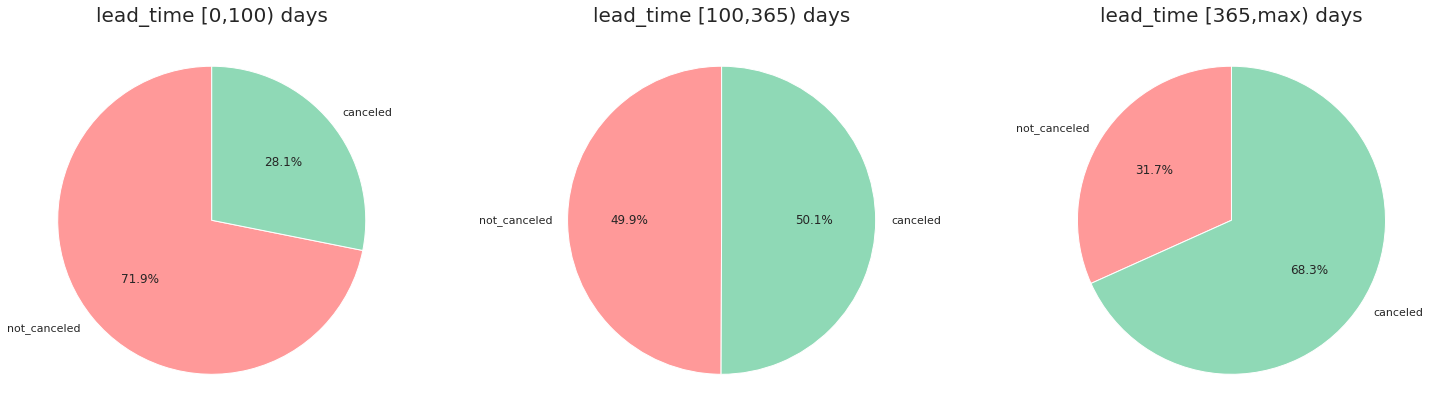

In [22]:
fig, ax = plt.subplots(1,3, figsize=(21,6))
ax[0].pie(np.array([total_lead_days_cancel[0][0], total_lead_days_cancel[1][0]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['#ff9999', '#8fd9b6'])
ax[0].set_title("lead_time [0,100) days", size=20)
ax[1].pie(np.array([total_lead_days_cancel[0][1], total_lead_days_cancel[1][1]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['#ff9999', '#8fd9b6'])
ax[1].set_title("lead_time [100,365) days", size=20)
ax[2].pie(np.array([total_lead_days_cancel[0][2], total_lead_days_cancel[1][2]]),
          labels=["not_canceled", "canceled"], autopct='%1.1f%%', startangle=90,
          colors=['#ff9999', '#8fd9b6'])
ax[2].set_title("lead_time [365,max) days", size=20)
plt.tight_layout()
plt.show()

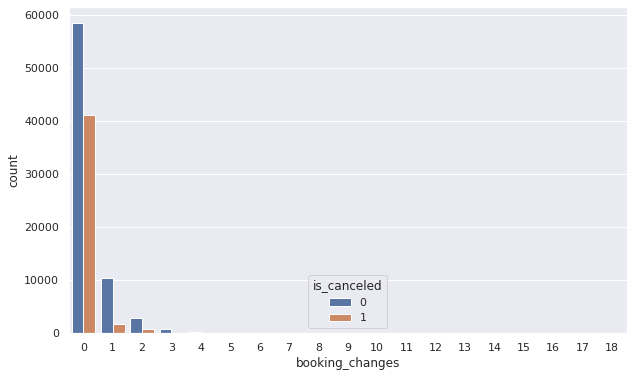

In [23]:
# 예약 변경건이 있는 경우, 취소율 하락

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='booking_changes', hue='is_canceled', data=df)

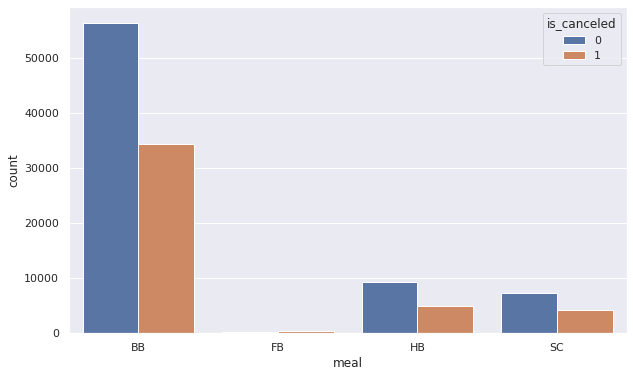

In [24]:
# 식사 신청별 취소율

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='meal', hue='is_canceled', data=df)

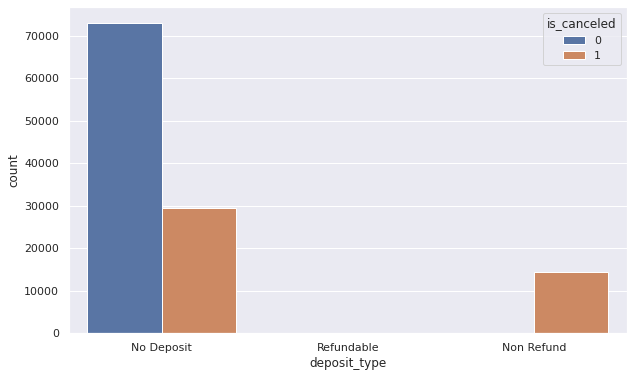

In [25]:
# 디파짓별 취소율

plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.countplot(x='deposit_type', hue='is_canceled', data=df)

## **< 데이터 나누기 >**

In [26]:
# 훈련/테스트 데이터 세트로 나누기

train, test = train_test_split(df, test_size=0.2, random_state=2)
print(train.shape, test.shape)

# 훈련데이터를 훈련데이터와 검증데이터로 분리
train, val = train_test_split(train, test_size=0.2, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)
print("test shape: ", test.shape)

(93744, 35) (23437, 35)
train shape:  (74995, 35)
val shape:  (18749, 35)
test shape:  (23437, 35)


In [27]:
# 타겟 데이터 범주의 비율을 확인합니다.
# 1 = 취소됨 / 0 = 예약 상태
# 6:4 정도의 비율로 불균형 데이터는 아닌것 같다.

target = 'is_canceled'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.622175
1    0.377825
Name: is_canceled, dtype: float64

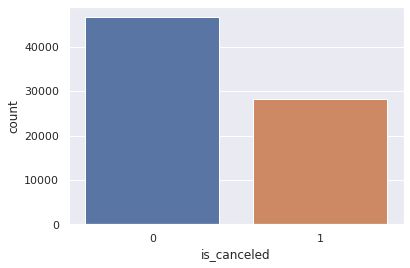

In [28]:
sns.countplot(x=y_train);

## **< 정보누수 확인 >**

In [29]:
# 정보 누수 확인
# 검증정확도가 1이라는 것은 과적합되었다는 것.

target = 'is_canceled'
features = df.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  1.0


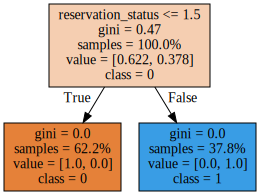

In [30]:
# 간단한 트리모델로 과적합을 유발하는 특성 확인

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

In [31]:
# 과적합을 유발하는 reservation_status과 연관된 reservation_status_date 특성 삭제
# 삭제 후 다시 검증 정확도 확인
# 또다시 1이 나왔다는 것은, 이것 외에도 과적합을 유발하는 다른 특성이 있다는 것.

features = df.columns.drop([target
                            , 'reservation_status'
                            , 'reservation_status_date'
                           ])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 1.0


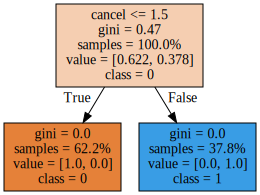

In [32]:
# 결정트리로 상단 특성 확인

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

In [33]:
# 확인된 cancel특성 추가 삭제
# 검증 정확도가 0.77로 내려간 것으로 정보누수를 일으키는 특성은 모두 삭제 되었다.

features = df.columns.drop([target
                            , 'reservation_status'
                            , 'reservation_status_date'
                            , 'cancel'
                           ])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.7771614486105926


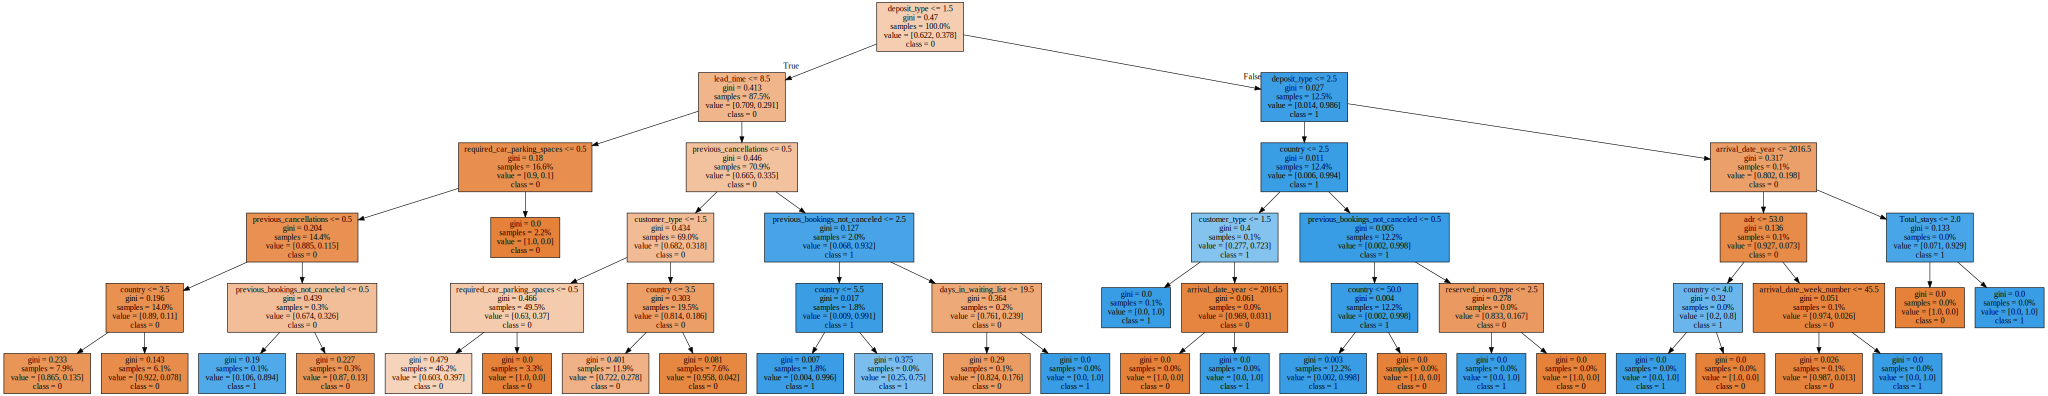

In [34]:
# 트리 확인

tree = pipe.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    proportion=True
)

graphviz.Source(dot_data)

# **< 상관관계 분석 >**

In [35]:
warnings.filterwarnings('ignore')
corr_df = df.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_people,Total_stays
is_canceled,1.00,0.29,0.01,0.01,-0.01,-0.01,0.02,0.06,0.00,-0.03,-0.07,0.11,-0.05,-0.14,-0.05,-0.08,0.05,0.03,-0.20,-0.24,0.04,0.01
lead_time,0.29,1.00,0.04,0.13,0.00,0.08,0.16,0.13,-0.04,-0.02,-0.11,0.09,-0.07,0.00,-0.02,-0.08,0.17,-0.09,-0.12,-0.10,0.06,0.15
arrival_date_year,0.01,0.04,1.00,-0.54,0.00,0.02,0.03,0.04,0.06,-0.01,0.01,-0.12,0.03,0.03,0.06,0.03,-0.06,0.21,-0.02,0.11,0.06,0.03
arrival_date_week_number,0.01,0.13,-0.54,1.00,0.07,0.02,0.02,0.03,0.01,0.01,-0.03,0.04,-0.02,0.01,-0.02,-0.03,0.02,0.09,0.00,0.03,0.03,0.02
arrival_date_day_of_month,-0.01,0.00,0.00,0.07,1.00,-0.02,-0.03,0.00,0.01,-0.00,-0.00,-0.03,0.00,0.01,-0.00,0.00,0.02,0.03,0.01,0.00,0.01,-0.03
stays_in_weekend_nights,-0.01,0.08,0.02,0.02,-0.02,1.00,0.49,0.11,0.05,0.02,-0.07,-0.01,-0.04,0.05,0.16,-0.08,-0.06,0.04,-0.02,0.08,0.11,0.76
stays_in_week_nights,0.02,0.16,0.03,0.02,-0.03,0.49,1.00,0.11,0.05,0.02,-0.08,-0.01,-0.05,0.07,0.20,-0.04,-0.00,0.05,-0.03,0.07,0.11,0.94
adults,0.06,0.13,0.04,0.03,0.00,0.11,0.11,1.00,0.07,0.02,-0.17,-0.01,-0.13,-0.05,0.02,-0.20,-0.01,0.29,0.02,0.16,0.78,0.12
children,0.00,-0.04,0.06,0.01,0.01,0.05,0.05,0.07,1.00,0.02,-0.03,-0.02,-0.02,0.05,0.06,-0.04,-0.03,0.37,0.06,0.08,0.66,0.05
babies,-0.03,-0.02,-0.01,0.01,-0.00,0.02,0.02,0.02,0.02,1.00,-0.01,-0.01,-0.01,0.09,0.03,-0.01,-0.01,0.03,0.04,0.10,0.18,0.02


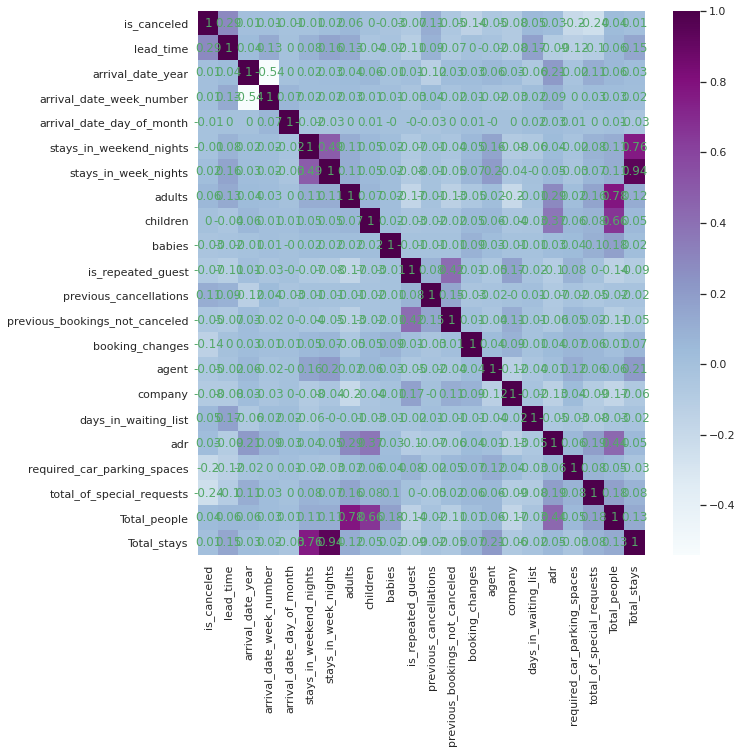

In [36]:
fig, ax = plt.subplots( figsize=(10,10) )
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='BuPu')
plt.show()

## **< 기준모델 만들기 >**
분류문제의 기준모델 = 범주 0 (majority class)

In [37]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

# 최다 클래스의 빈도가 정확도가 됩니다.
print("training accuracy: ", accuracy_score(y_train, y_pred))

# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

training accuracy:  0.6221748116541103
validation accuracy:  0.6335271214464772


# **< Default 모델 설정 >**

### 1. Logistic Regression

In [38]:
# OneHot Encoder

pipe_lr_One = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression()
)
pipe_lr_One.fit(X_train, y_train)

print("training accuracy: ", pipe_lr_One.score(X_train, y_train))
print("validation accuracy: ", pipe_lr_One.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_lr_One.predict(X_val)))

training accuracy:  0.8156677111807454
validation accuracy:  0.8246306469678383
F1-sccore:  0.7404483738553836


In [39]:
# Ordinal Encoder

pipe_lr_Ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression()
)
pipe_lr_Ord.fit(X_train, y_train)

print("training accuracy: ", pipe_lr_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_lr_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_lr_Ord.predict(X_val)))

training accuracy:  0.7929861990799386
validation accuracy:  0.8051629420235746
F1-sccore:  0.682651376943793


### 2. Decision Tree

In [40]:
# OneHot Encoder

pipe_dct_One = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe_dct_One.fit(X_train, y_train)
y_pred = pipe_dct_One.predict(X_val)

print("training accuracy: ", pipe_dct_One.score(X_train, y_train))
print("validation accuracy: ", pipe_dct_One.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_dct_One.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.9964397626508434
validation accuracy:  0.8583924475972052
F1-sccore:  0.8093357271095153
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     11695
           1       0.82      0.80      0.81      7054

    accuracy                           0.86     18749
   macro avg       0.85      0.85      0.85     18749
weighted avg       0.86      0.86      0.86     18749



In [41]:
# 훈련 정확도 0.99 완전 과적합
# decision tree 는 과적합이 자주 발생
# 복잡도를 낮추어 일반화 유도
# 간단하게 min_samples_leaf, max_depth를 사용

pipe_dct_One1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, max_depth=10, random_state=2, criterion='entropy')
)

pipe_dct_One1.fit(X_train, y_train)
y_pred = pipe_dct_One1.predict(X_val)

print("training accuracy: ", pipe_dct_One1.score(X_train, y_train))
print("validation accuracy: ", pipe_dct_One1.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_dct_One1.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.8420294686312421
validation accuracy:  0.8466051522747879
F1-sccore:  0.7797518762444479
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     12562
           1       0.74      0.82      0.78      6187

    accuracy                           0.85     18749
   macro avg       0.82      0.84      0.83     18749
weighted avg       0.85      0.85      0.85     18749



In [42]:
# Ordinal Encoder
# min_samples_leaf, max_depth를 사용

pipe_dct_Ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, max_depth=10, random_state=2, criterion='entropy')
)

pipe_dct_Ord.fit(X_train, y_train)
y_pred = pipe_dct_Ord.predict(X_val)

print("training accuracy: ", pipe_dct_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_dct_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_dct_Ord.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.833922261484099
validation accuracy:  0.8406315003466852
F1-sccore:  0.773602060918321
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     12422
           1       0.74      0.81      0.77      6327

    accuracy                           0.84     18749
   macro avg       0.82      0.83      0.83     18749
weighted avg       0.85      0.84      0.84     18749



### 3. 랜덤포레스트(Random Forests)

In [43]:
# OneHot Encoder

pipe_rf_One= make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf_One.fit(X_train, y_train)
y_pred = pipe_rf_One.predict(X_val)


print("training accuracy: ", pipe_rf_One.score(X_train, y_train))
print("validation accuracy: ", pipe_rf_One.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_rf_One.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.9964397626508434
validation accuracy:  0.8961011253933543
F1-sccore:  0.8517954960438223
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12476
           1       0.81      0.89      0.85      6273

    accuracy                           0.90     18749
   macro avg       0.88      0.90      0.89     18749
weighted avg       0.90      0.90      0.90     18749



In [44]:
# Ordinal Encoder

pipe_rf_Ord= make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf_Ord.fit(X_train, y_train)
y_pred = pipe_rf_Ord.predict(X_val)

print("training accuracy: ", pipe_rf_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_rf_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_rf_Ord.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.9964397626508434
validation accuracy:  0.8942343591658222
F1-sccore:  0.8499659529393964
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12403
           1       0.82      0.89      0.85      6346

    accuracy                           0.89     18749
   macro avg       0.88      0.89      0.88     18749
weighted avg       0.90      0.89      0.90     18749



In [45]:
pipe_rf_One.named_steps['randomforestclassifier'].oob_score_

0.886885792386159

In [46]:
pipe_rf_Ord.named_steps['randomforestclassifier'].oob_score_

0.8881125408360557

### 4. XGBoost

In [47]:
# OneHot Encoder

pipe_XGB_One = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(), 
    XGBClassifier(n_estimators=200, random_state=2, n_jobs=-1, learning_rate=0.2)
    )

pipe_XGB_One.fit(X_train, y_train)
y_pred = pipe_XGB_One.predict(X_val)

print("training accuracy: ", pipe_XGB_One.score(X_train, y_train))
print("validation accuracy: ", pipe_XGB_One.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_XGB_One.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.8681912127475165
validation accuracy:  0.8692196917168916
F1-sccore:  0.8164395867644858
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     12262
           1       0.79      0.84      0.82      6487

    accuracy                           0.87     18749
   macro avg       0.85      0.86      0.86     18749
weighted avg       0.87      0.87      0.87     18749



In [48]:
# Ordinal Encoder

pipe_XGB_Ord = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(), 
    XGBClassifier(n_estimators=200, random_state=2, n_jobs=-1, learning_rate=0.2)
    )

pipe_XGB_Ord.fit(X_train, y_train)
y_pred = pipe_XGB_Ord.predict(X_val)

print("training accuracy: ", pipe_XGB_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_XGB_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_XGB_Ord.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.8712847523168211
validation accuracy:  0.8726865432823084
F1-sccore:  0.8220117813734993
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12209
           1       0.80      0.84      0.82      6540

    accuracy                           0.87     18749
   macro avg       0.86      0.87      0.86     18749
weighted avg       0.87      0.87      0.87     18749



### 5. GradientBoosting

In [49]:
# OneHot Encoder

pipe_GDB_One = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(), 
    XGBClassifier(n_estimators=200, random_state=2, n_jobs=-1, learning_rate=0.2)
    )

pipe_GDB_One.fit(X_train, y_train)
y_pred = pipe_GDB_One.predict(X_val)

print("training accuracy: ", pipe_GDB_One.score(X_train, y_train))
print("validation accuracy: ", pipe_GDB_One.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_GDB_One.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.8681912127475165
validation accuracy:  0.8692196917168916
F1-sccore:  0.8164395867644858
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     12262
           1       0.79      0.84      0.82      6487

    accuracy                           0.87     18749
   macro avg       0.85      0.86      0.86     18749
weighted avg       0.87      0.87      0.87     18749



In [50]:
# Ordinal Encoder

pipe_GDB_Ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    GradientBoostingClassifier(n_estimators=100, random_state=2, learning_rate=1.0)
)

pipe_GDB_Ord.fit(X_train, y_train)
y_pred = pipe_GDB_Ord.predict(X_val)

print("training accuracy: ", pipe_GDB_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_GDB_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_GDB_Ord.predict(X_val)))
print(classification_report(y_pred, y_val))

training accuracy:  0.8799919994666311
validation accuracy:  0.8723665262147314
F1-sccore:  0.8248554490229086
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11957
           1       0.82      0.83      0.82      6792

    accuracy                           0.87     18749
   macro avg       0.86      0.86      0.86     18749
weighted avg       0.87      0.87      0.87     18749



In [51]:
# 모델별 score 확인

compare_score = pd.DataFrame({'ID':['training accuracy', 'validation accuracy', 'F1-sccore'],
                              'lr_One':[pipe_lr_One.score(X_train, y_train), pipe_lr_One.score(X_val, y_val), f1_score(y_val, pipe_lr_One.predict(X_val))],
                              'lr_Ord':[pipe_lr_Ord.score(X_train, y_train), pipe_lr_Ord.score(X_val, y_val), f1_score(y_val, pipe_lr_Ord.predict(X_val))],
                              'dct_One1':[pipe_dct_One1.score(X_train, y_train), pipe_dct_One1.score(X_val, y_val), f1_score(y_val, pipe_dct_One1.predict(X_val))],
                              'dct_Ord':[pipe_dct_Ord.score(X_train, y_train), pipe_dct_Ord.score(X_val, y_val), f1_score(y_val, pipe_dct_Ord.predict(X_val))],
                              'rf_One':[pipe_rf_One.score(X_train, y_train), pipe_rf_One.score(X_val, y_val), f1_score(y_val, pipe_rf_One.predict(X_val))],
                              'rf_Ord':[pipe_rf_Ord.score(X_train, y_train), pipe_rf_Ord.score(X_val, y_val), f1_score(y_val, pipe_rf_Ord.predict(X_val))],
                              'XGB_One':[pipe_XGB_One.score(X_train, y_train), pipe_XGB_One.score(X_val, y_val), f1_score(y_val, pipe_XGB_One.predict(X_val))],
                              'XGB_Ord':[pipe_XGB_Ord.score(X_train, y_train), pipe_XGB_Ord.score(X_val, y_val), f1_score(y_val, pipe_XGB_Ord.predict(X_val))],
                              'GDB_One':[pipe_GDB_One.score(X_train, y_train), pipe_GDB_One.score(X_val, y_val), f1_score(y_val, pipe_GDB_One.predict(X_val))],
                              'GDB_Ord':[pipe_GDB_Ord.score(X_train, y_train), pipe_GDB_Ord.score(X_val, y_val), f1_score(y_val, pipe_GDB_Ord.predict(X_val))]
                             })
compare_score

,ID,lr_One,lr_Ord,dct_One1,dct_Ord,rf_One,rf_Ord,XGB_One,XGB_Ord,GDB_One,GDB_Ord
0,training accuracy,0.815668,0.792986,0.842029,0.833922,0.996440,0.996440,0.868191,0.871285,0.868191,0.879992
1,validation accuracy,0.824631,0.805163,0.846605,0.840632,0.896101,0.894234,0.869220,0.872687,0.869220,0.872367
2,F1-sccore,0.740448,0.682651,0.779752,0.773602,0.851795,0.849966,0.816440,0.822012,0.816440,0.824855




---
###*   Random Forest, XGBoost, GradientBoosting 하이퍼파라미터 튜닝 진행
###*   인코더는 Ordinal Encoder로 진행
---



# **< 하이퍼파라미터 튜닝 >**

### 1. 랜덤포레스트(Random Forests)

In [52]:
# RandomizedSearchCV 

pipe_rf_randomCV = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    RandomForestClassifier()
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': stats.randint(50, 200),
    'randomforestclassifier__max_depth': range(7, 30),
    'randomforestclassifier__max_features': uniform(0, 1),
    'randomforestclassifier__class_weight' : ['balanced', 'balanced_subsample']
}

# n_iter=50
clf = RandomizedSearchCV(
    pipe_rf_randomCV, 
    param_distributions=dists, 
    n_iter=100, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 41.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 65.0min finished


In [ ]:
print('Optimal Hyperparameter : ', clf.best_params_)

In [54]:
pipe_rf_randomCV1 = clf.best_estimator_

y_pred_rf_randomCV1 = pipe_rf_randomCV1.predict(X_val)

print('F1 score :',f1_score(y_val, y_pred_rf_randomCV1))
print('accuracy score :',accuracy_score(y_val, y_pred_rf_randomCV1))
print(classification_report(y_val, y_pred_rf_randomCV1))

F1 score : 0.855130346380074
accuracy score : 0.8935943250306683
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11878
           1       0.85      0.86      0.86      6871

    accuracy                           0.89     18749
   macro avg       0.89      0.89      0.89     18749
weighted avg       0.89      0.89      0.89     18749



### 2. XGBoost

In [ ]:
# RandomizedSearchCV 
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터


XGB = XGBClassifier(random_state=1)
param_RD =[{"learning_rate": [0.1, 0.01, 0.001],
               "max_depth": [7, 10, 15],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500]
}] 
XGB_RD = RandomizedSearchCV(estimator=XGB, param_distributions=param_RD, scoring='f1', cv=5, n_jobs=-1, n_iter=100, verbose=1)
XGB_RD.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 204.5min


In [ ]:
# RandomizedSearchCV 학습 결과 출력
print('베스트 하이퍼 파라미터: {0}'.format(XGB_RD.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.2f}'.format(XGB_RD.best_score_))

# 최적화 모델 추출
pipe_XGB_RDCV1 = XGB_RD.best_estimator_

y_pred_XGB_RDCV1 = pipe_XGB_RDCV1.predict(X_val_encoded)

print('F1 score :',f1_score(y_val, y_pred_XGB_RDCV1))
print('accuracy score :',accuracy_score(y_val, y_pred_XGB_RDCV1))
print(classification_report(y_val, y_pred_XGB_RDCV1))

# 테스트세트 정확도 출력
# score = model.score(X_test, y_test)
# print('테스트 세트에서의 정확도: {0:.2f}'.format(score))
#  https://github.com/minye3025/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb
#  https://jfun.tistory.com/122

In [55]:
# # GridSearchCV 

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
# X_val_encoded = encoder.transform(X_val) # 검증데이터


# XGB = XGBClassifier(random_state=1)
# param_grid =[{"learning_rate": [0.1, 0.01, 0.001],
#                "max_depth": [7, 10, 15],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 250, 500]
# }] 
# XGB_gs = GridSearchCV(estimator=XGB, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)
# XGB_gs.fit(X_train_encoded, y_train)

KeyboardInterrupt: ignored

In [ ]:
# # 그리드서치 학습 결과 출력
# print('베스트 하이퍼 파라미터: {0}'.format(XGB_gs.best_params_))
# print('베스트 하이퍼 파라미터 일 때 정확도: {0:.2f}'.format(XGB_gs.best_score_))

# # 최적화 모델 추출
# pipe_XGB_gsCV1 = XGB_gs.best_estimator_

# y_pred_XGB_gsCV1 = pipe_XGB_gsCV1.predict(X_val_encoded)

# print('F1 score :',f1_score(y_val, y_pred_XGB_gsCV1))
# print('accuracy score :',accuracy_score(y_val, y_pred_XGB_gsCV1))
# print(classification_report(y_val, y_pred_XGB_gsCV1))

# # 테스트세트 정확도 출력
# # score = model.score(X_test, y_test)
# # print('테스트 세트에서의 정확도: {0:.2f}'.format(score))
# #  https://github.com/minye3025/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb
# #  https://jfun.tistory.com/122

### 3. GradientBoosting

In [ ]:
# RandomizedSearchCV 
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터


GDB = GradientBoostingClassifier(random_state=1)
param_Randomized =[{'n_estimators': range(5, 50, 100),
              'max_features': range(10, 20),
              'max_depth': range(5, 10),
              'learning_rate': np.linspace(0.1, 1, 10)
}] 

GDB_RD = RandomizedSearchCV(estimator=GDB, param_distributions=param_Randomized, scoring='f1', cv=5, n_jobs=-1, n_iter=100, verbose=1)
GDB_RD.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
# RandomizedSearchCV 학습 결과 출력
print('베스트 하이퍼 파라미터: {0}'.format(GDB_RD.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.2f}'.format(GDB_RD.best_score_))

# 최적화 모델 추출
pipe_GDB_RDCV1 = GDB_RD.best_estimator_

y_pred_GDB_RDCV1 = pipe_GDB_RDCV1.predict(X_val_encoded)

print('F1 score :',f1_score(y_val, y_pred_GDB_RDCV1))
print('accuracy score :',accuracy_score(y_val, y_pred_GDB_RDCV1))
print(classification_report(y_val, y_pred_GDB_RDCV1))

# 테스트세트 정확도 출력
# score = model.score(X_test, y_test)
# print('테스트 세트에서의 정확도: {0:.2f}'.format(score))
#  https://github.com/minye3025/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb
#  https://jfun.tistory.com/122

베스트 하이퍼 파라미터: {'n_estimators': 5, 'max_features': 18, 'max_depth': 9, 'learning_rate': 1.0}
베스트 하이퍼 파라미터 일 때 정확도: 0.81
F1 score : 0.8177500742059959
accuracy score : 0.8690063470051737
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11878
           1       0.83      0.80      0.82      6871

    accuracy                           0.87     18749
   macro avg       0.86      0.85      0.86     18749
weighted avg       0.87      0.87      0.87     18749



In [ ]:
# GridSearchCV
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

gb = GradientBoostingClassifier(random_state=1)
param_grid =[{'n_estimators': (3, 5, 10, 100),
              'max_features': (18, 20, 22),
              'max_depth': (9, 11, 13),
              'learning_rate': (0.1, 1.0, 10)
}] 
gs = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 80.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...e=None,
          

In [ ]:
# GridSearchCV 학습 결과 출력
print('베스트 하이퍼 파라미터: {0}'.format(gs.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.2f}'.format(gs.best_score_))

# 최적화 모델 추출
pipe_GDB_gsCV1 = gs.best_estimator_

y_pred_GDB_gsCV1 = pipe_GDB_gsCV1.predict(X_val_encoded)
m
print('F1 score :',f1_score(y_val, y_pred_GDB_gsCV1))
print('accuracy score :',accuracy_score(y_val, y_pred_GDB_gsCV1))
print(classification_report(y_val, y_pred_GDB_gsCV1))
# 테스트세트 정확도 출력
# score = model.score(X_test, y_test)
# print('테스트 세트에서의 정확도: {0:.2f}'.format(score))
#  https://github.com/minye3025/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb
#  https://jfun.tistory.com/122

베스트 하이퍼 파라미터: {'learning_rate': 0.1, 'max_depth': 13, 'max_features': 20, 'n_estimators': 100}
베스트 하이퍼 파라미터 일 때 정확도: 0.85
F1 score : 0.8570369821388869
accuracy score : 0.8971145127740147
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11878
           1       0.87      0.84      0.86      6871

    accuracy                           0.90     18749
   macro avg       0.89      0.89      0.89     18749
weighted avg       0.90      0.90      0.90     18749



In [ ]:
# 하이퍼파라미터 튜닝 후 테스트 세트 확인

encoder = OrdinalEncoder()
X_test = test[features]
y_test = test[target] 

X_test_encoded = encoder.fit_transform(X_test) # 테스트 데이터

prediction1 = pipe_GDB_gsCV1.predict(X_test_encoded)

# 테스트세트 정확도 출력
print('F1 score :',f1_score(prediction1, y_test))
print('accuracy score :',accuracy_score(prediction1, y_test))
print(classification_report(prediction1, y_test))
# print('테스트 세트에서의 정확도: {0:.2f}'.format(score))
#  https://github.com/minye3025/ds-section2-sprint1/blob/main/n211-simple-regression/n211a-simple-regression.ipynb
#  https://jfun.tistory.com/122

F1 score : 0.438649030862657
accuracy score : 0.4241583820454836
              precision    recall  f1-score   support

           0       0.32      0.58      0.41      8117
           1       0.60      0.34      0.44     15320

    accuracy                           0.42     23437
   macro avg       0.46      0.46      0.42     23437
weighted avg       0.51      0.42      0.43     23437



In [ ]:
# 그레디언트 기본 모델 테스트 세트 확인
# Ordinal Encoder

pipe_GDB_Ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    GradientBoostingClassifier(n_estimators=100, random_state=2, learning_rate=1.0)
)

pipe_GDB_Ord.fit(X_train, y_train)
y_pred = pipe_GDB_Ord.predict(X_val)
test_pred = pipe_GDB_Ord.predict(X_test)
y_test = test[target] 

print("training accuracy: ", pipe_GDB_Ord.score(X_train, y_train))
print("validation accuracy: ", pipe_GDB_Ord.score(X_val, y_val))
print("F1-sccore: ", f1_score(y_val, pipe_GDB_Ord.predict(X_val)))
print(classification_report(y_pred, y_val))
print("=======================================================================")

print("test accuracy: ", accuracy_score(test_pred, y_test))
print("F1-sccore: ", f1_score(y_test, test_pred))
print(classification_report(test_pred, y_test))


# print('F1 score :',f1_score(prediction1, y_test))
# print('accuracy score :',accuracy_score(prediction1, y_test))
# print(classification_report(prediction1, y_test))

training accuracy:  0.8799919994666311
validation accuracy:  0.8723665262147314
F1-sccore:  0.8248554490229086
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11957
           1       0.82      0.83      0.82      6792

    accuracy                           0.87     18749
   macro avg       0.86      0.86      0.86     18749
weighted avg       0.87      0.87      0.87     18749

test accuracy:  0.8729359559670606
F1-sccore:  0.8273423005565863
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     14911
           1       0.82      0.84      0.83      8526

    accuracy                           0.87     23437
   macro avg       0.86      0.87      0.86     23437
weighted avg       0.87      0.87      0.87     23437



## ROC Curve 확인 및 시각화

In [64]:
y_test = test[target] 
pipe_GDB_Ord.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [65]:
y_pred_proba = pipe_GDB_Ord.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.99330327, 0.99931401, 0.00996798, ..., 0.54775672, 0.61126592,
       0.01140988])

False    14911
True      8526
dtype: int64

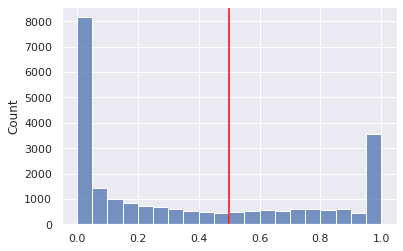

In [66]:
# Randomforestclassifier 기본 임계값은 0.5입니다.
threshold = 0.5
y_pred_proba = pipe_GDB_Ord.predict_proba(X_test)[:, 1]
y_pred = y_pred_proba > threshold

ax = sns.histplot(y_pred_proba)
ax.axvline(threshold, color='red')

pd.Series(y_pred).value_counts()

In [67]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.000115,1.000000e+00
2,0.000136,0.000115,1.000000e+00
3,0.000136,0.000229,1.000000e+00
4,0.000204,0.000229,1.000000e+00
...,...,...,...
6226,0.985117,1.000000,3.078404e-05
6227,0.985253,1.000000,3.059782e-05
6228,0.994359,1.000000,8.660967e-06
6229,0.994495,1.000000,8.513889e-06


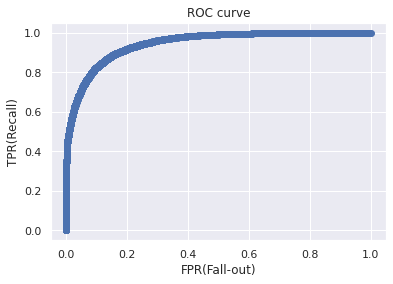

In [68]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [69]:
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score

0.9451322548742551

In [71]:
# encoder = pipe.named_steps['ordinalencoder']
# X_encoded = encoder.fit_transform(X_test)
# gdb = pipe.named_steps['GradientBoostingClassifier']

KeyError: ignored

In [72]:
encoder = pipe.named_steps['ordinalencoder']
X_encoded = encoder.fit_transform(X_train)
rf = pipe.named_steps['randomforestclassifier']

KeyError: ignored

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


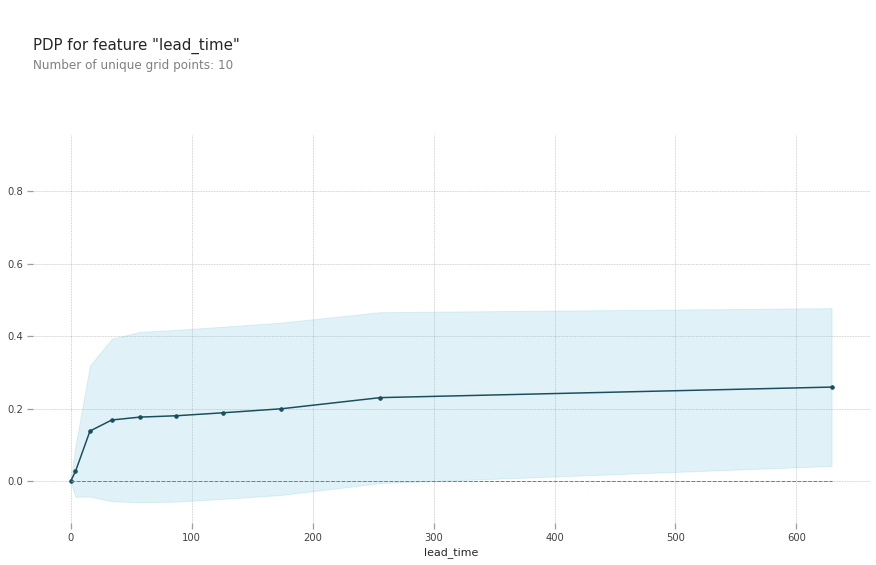

In [ ]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'lead_time'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); # 인코딩된 sex 값을 확인할 수 있습니다

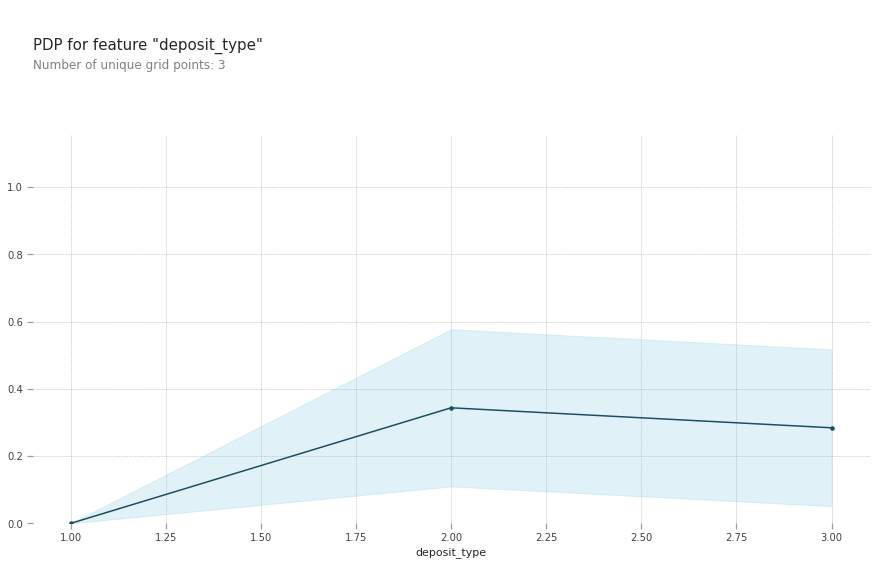

In [ ]:
feature = 'deposit_type'
pdp_dist = pdp.pdp_isolate(model=rf, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature); # 인코딩된 sex 값을 확인할 수 있습니다

In [ ]:

# 이번에는 PDP 카테고리값 맵핑을 자동으로 해보겠습니다

feature = 'deposit_type'
for item in encoder.mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping'] # Series
        
feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

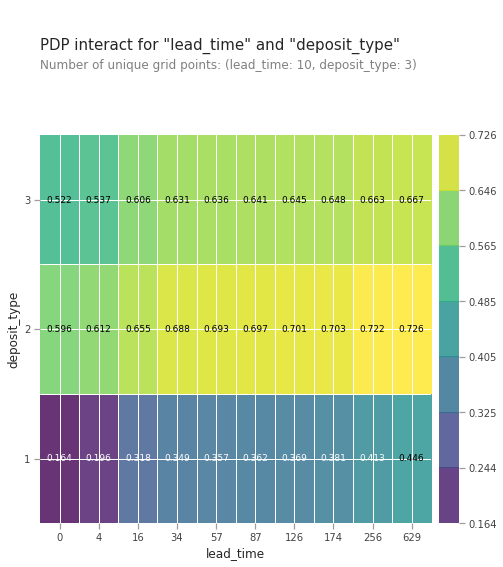

In [ ]:

from pdpbox.pdp import pdp_interact, pdp_interact_plot
# 2D PDP
features = ['lead_time', 'deposit_type']

interaction = pdp_interact(
    model=rf, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

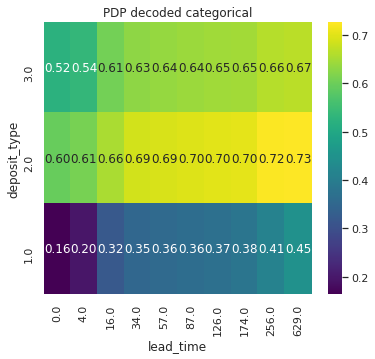

In [ ]:
# 2D PDP 를 Seaborn Heatmap으로 그리기 위해 데이터프레임으로 만듭니다
pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1]

pdp = pdp.rename(columns=dict(zip(category_codes, category_names)))
plt.figure(figsize=(6,5))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('PDP decoded categorical');